In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
features = pd.read_csv('FakeNewsMaster-FS-nodup.csv')
list(features.columns)

['TF',
 'Bigram TF',
 'No. of Stop_words',
 'Out of Context',
 'Arts, Culture, Entertainment, Sports',
 'Conspiracy',
 'Business and Industrial',
 'economy, business and finance',
 'Religion and belief',
 'Law, Government and Politics',
 'Education',
 'Technology and Computing',
 'Science',
 'Sixltr',
 'conj',
 'interrog',
 'number',
 'negemo',
 'social',
 'certain',
 'percept',
 'focuspast',
 'focuspresent',
 'time',
 'PERSON',
 'TIME',
 'ORG',
 'GPE']

In [3]:
features.fillna(0,inplace=True)

In [4]:
df= pd.read_pickle('FakeNewsMaster-dup.pkl')
list(df.columns)

['id',
 'url',
 'title',
 'tweet_id',
 'text',
 'date',
 'grammatical errors',
 'Label',
 'Clean_text',
 'TF_temp',
 'TF',
 'Bigram TF_temp',
 'Bigram TF',
 'No. of Stop_words',
 'Out of Context temp',
 'Out of Context',
 'Textrazor_category',
 'Textrazor_topic',
 'Topics_category',
 'Topics_topic',
 'score_category',
 'score_topic',
 'category_score_final',
 'category_list_final',
 'topic_score_final',
 'topic_list_final',
 'arts, culture and entertainment',
 'Conspiracy',
 'crime, law and justice',
 'Criticism of journalism',
 'Advertising video on demand',
 'computing and information technology',
 'agriculture',
 'energy and resource',
 'economy, business and finance',
 'Harassment',
 'Cyberspace',
 'religion and belief',
 'Politics and technology',
 'Social media',
 'science and technology',
 'Social epistemology',
 'social issue',
 'environmental issue',
 'Academia',
 'Attacks',
 'Feminism',
 'Sports',
 'Internet-Cyberspace',
 'Science',
 'Sixltr',
 'conj',
 'interrog',
 'number',

In [5]:
print(len(df))
print(len(features))

17934
17934


In [6]:
X=features.loc[:,['TF','Bigram TF','No. of Stop_words', 'Out of Context', 'Religion and belief', 'Law, Government and Politics',
 'Sixltr', 'conj', 'interrog', 'number', 'negemo', 'social', 'certain', 'percept', 'focuspast', 'focuspresent', 'time','PERSON','ORG','TIME','GPE']]

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [7]:
X=X.iloc[:,:].values

In [8]:
#creating the dependant variable y
y= df.loc[:,['Label']]

In [9]:
y=y.iloc[:,0].values

In [10]:
print(type(y))
print(type(X))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
# #splitting our data into train and test, 20% test and 80% train
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [13]:
#Stratified split
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit( n_splits=5, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 4368  8811  7743 ... 13460 11653 14946] TEST: [ 4925  2251  9677 ... 11113  6431 17759]
TRAIN: [16660  7641 17514 ...  1327  7627  1487] TEST: [17522  9760 16575 ... 10618 15418   580]
TRAIN: [12694 12735  1587 ...  9334   801 10753] TEST: [14997  2342  4988 ... 11072  1498 12384]
TRAIN: [ 3555  8806  6674 ...  3924   182 11484] TEST: [11209 14504 12532 ... 10879 13607 11855]
TRAIN: [  561  3795 17253 ... 14910  7366  1319] TEST: [ 2740 16403 12556 ... 11218  8167  8876]


In [14]:
#Applying feature scaling so that training is faster
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Confusion matrix with Naive Bayes: 
[[ 798   35]
 [ 594 2160]]
Accuracy with Naive Bayes: 
0.8246445497630331
Accuracy and Standard deviation after applying k-fold cross validation, k=10
0.832578640191662
0.010253315651728937


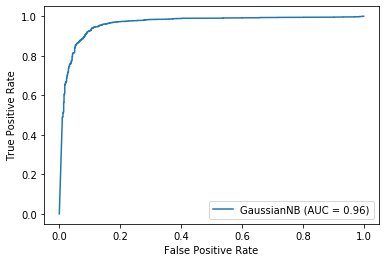

In [15]:
#classifier naive bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


print("Confusion matrix with Naive Bayes: ")
print(cm)
print("Accuracy with Naive Bayes: ")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

print("Accuracy and Standard deviation after applying k-fold cross validation, k=10")
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

from sklearn import  metrics
naive_bayes = metrics.plot_roc_curve(classifier, X_test, y_test)

Confusion matrix with random forests: 
[[ 767   66]
 [  22 2732]]
Accuracy with random forests: 
0.9754669640367996
Accuracy and Standard deviation after applying k-fold cross validation, k=10
0.9721890474732602
0.0035348255438226363


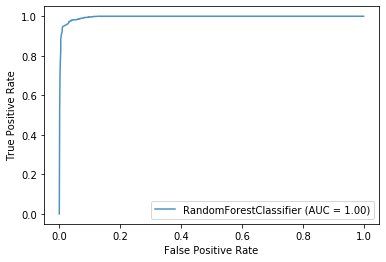

In [16]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix with random forests: ")
print(cm)
print("Accuracy with random forests: ")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

print("Accuracy and Standard deviation after applying k-fold cross validation, k=10")
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

# # Applying Grid Search to find the best model and the best parameters
# from sklearn.model_selection import GridSearchCV
# parameters = [{'n_estimators': [10, 20, 50, 100], 'criterion': ['entropy', 'gini'], 'random_state':[0], 'max_features':['auto', None ]}
#              ]
    
# grid_search = GridSearchCV(estimator = classifier,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10,
#                            n_jobs = -1)
# grid_search = grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_

# print("Accuracy with Grid search :")
# print(best_accuracy)

# print("Best parameters for random forests for best accuracy")
# print(best_parameters)

from sklearn.metrics import plot_roc_curve
ax=plt.gca()
random_forests = metrics.plot_roc_curve(classifier, X_test, y_test, ax=ax, alpha=0.8)


In [17]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix with decision tree: ")
print(cm)
print("Accuracy with decision tree: ")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

print("Accuracy and Standard deviation after applying k-fold cross validation, k=10")
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

from sklearn import  metrics
decision_tree = metrics.plot_roc_curve(classifier, X_test, y_test,ax=ax, alpha=0.8)

Confusion matrix with decision tree: 
[[ 769   64]
 [  58 2696]]
Accuracy with decision tree: 
0.9659882910510176
Accuracy and Standard deviation after applying k-fold cross validation, k=10
0.9607587265950365
0.005091361890385163


In [18]:
classifier.feature_importances_

array([0.00748927, 0.00551953, 0.00797856, 0.07138059, 0.0016126 ,
       0.01941513, 0.01044544, 0.00813266, 0.00341525, 0.00902516,
       0.00689366, 0.01098836, 0.00570897, 0.0095931 , 0.01084672,
       0.006406  , 0.00742437, 0.71158446, 0.07063808, 0.00298385,
       0.01251825])

Confusion matrix with K Nearest Neighbours: 
[[ 705  128]
 [ 103 2651]]
Accuracy with K nearest Neighbours: 
0.9356007805965988
Accuracy and Standard deviation after applying k-fold cross validation, k=10
0.9303684049392794
0.005914506219953065


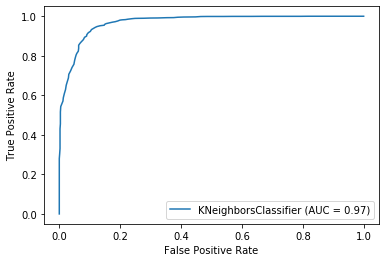

In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 110, p=1, algorithm='auto')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix with K Nearest Neighbours: ")
print(cm)
print("Accuracy with K nearest Neighbours: ")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

print("Accuracy and Standard deviation after applying k-fold cross validation, k=10")
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

# # Applying Grid Search to find the best model and the best parameters
# from sklearn.model_selection import GridSearchCV
# parameters = [{'n_neighbors': [90, 110, 100], 'metric': ['minkowski'], 'p':[1], "algorithm":['auto'] }]
# grid_search = GridSearchCV(estimator = classifier,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10,
#                            n_jobs = -1)
# grid_search = grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_

# print("Accuracy with Grid search :")
# print(best_accuracy)

# print("Best parameters for KNN for best accuracy")
# print(best_parameters)

from sklearn import  metrics
KNN = metrics.plot_roc_curve(classifier, X_test, y_test)

Confusion matrix with XGBoost: 
[[ 773   60]
 [  32 2722]]
Accuracy with XGBoost: 
0.9743518260384723
Accuracy and Standard deviation after applying k-fold cross validation, k=10
0.9723287604663255
0.0035265591284579646


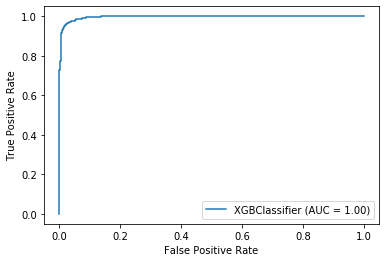

In [20]:
import xgboost
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix with XGBoost: ")
print(cm)
print("Accuracy with XGBoost: ")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

print("Accuracy and Standard deviation after applying k-fold cross validation, k=10")
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

from sklearn import  metrics
XGboost = metrics.plot_roc_curve(classifier, X_test, y_test)


Confusion matrix with kernel SVM: 
[[ 742   91]
 [  64 2690]]
Accuracy with kernel SVM: 
0.9567884025648173
Accuracy and Standard deviation after applying k-fold cross validation, k=10
0.9576909208422629
0.0033076673528447953


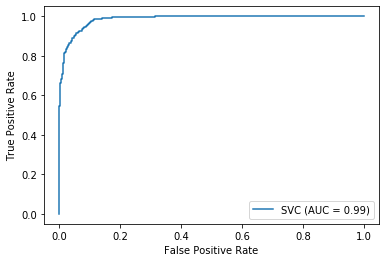

In [21]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, gamma='scale', C=10)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix with kernel SVM: ")
print(cm)
print("Accuracy with kernel SVM: ")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

print("Accuracy and Standard deviation after applying k-fold cross validation, k=10")
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

from sklearn import  metrics
svm = metrics.plot_roc_curve(classifier, X_test, y_test)

In [22]:

# # Applying Grid Search to find the best model and the best parameters
# from sklearn.model_selection import GridSearchCV
# parameters = [ {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma':['scale','auto']}]
# grid_search = GridSearchCV(estimator = classifier,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10,
#                            n_jobs = -1)
# grid_search = grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_

# print("Accuracy with Grid search :")
# print(best_accuracy)

# print("Best parameters for SVM for best accuracy")
# print(best_parameters)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

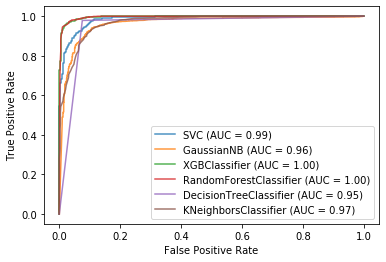

In [23]:
#plotting the graphs
ax=plt.gca()
svm.plot(ax=ax, alpha=0.8)
naive_bayes.plot(ax=ax, alpha=0.8)
XGboost.plot(ax=ax, alpha=0.8)
random_forests.plot(ax=ax, alpha=0.8)
decision_tree.plot(ax=ax, alpha=0.8)
KNN.plot(ax=ax, alpha=0.8)
fig = plt.gcf()
fig.savefig('FakeNewsMaster-FS2.eps',transparent=True, bbox_inches='tight', dpi=400)
plt.show()